In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Define column names manually (from UCI docs)
columns = [
    'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
    'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'
]

In [3]:
# Load the file and handle missing values ("?" is used for missing)
df = pd.read_csv('processed.cleveland.data', names=columns, na_values='?')

In [4]:
# Check how many missing values
print(df.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
target      0
dtype: int64


In [6]:
# Drop rows with missing values for simplicity
df = df.dropna()
print(df.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [7]:
# Convert types to float (they were read as objects due to '?')
df = df.astype(float)

In [8]:
# Simplify target:
# Original values: 0 (no disease), 1–4 (levels of disease)
# We convert to binary classification: 0 (no disease), 1 (disease)
df['target'] = df['target'].apply(lambda x: 1 if x > 0 else 0)


In [9]:

# Save to CSV if needed
df.to_csv('heart_clean.csv', index=False)

print(df.head())

    age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   

   slope   ca  thal  target  
0    3.0  0.0   6.0       0  
1    2.0  3.0   3.0       1  
2    2.0  2.0   7.0       1  
3    3.0  0.0   3.0       0  
4    1.0  0.0   3.0       0  


In [10]:
# ===  Features and Labels ===
X = df.drop('target', axis=1)  # All columns except target
y = df['target']               # Target column (0 or 1)

In [11]:
# === Train-Test Split ===
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:
# === Feature Scaling (Standardization) ===
scaler = StandardScaler() # This creates a scaler object.It hasn’t done anything yet — just set up the tool.
X_train = scaler.fit_transform(X_train)
# .fit_transform() does two things:

# fit() → Calculates the mean and standard deviation of the training data.

# transform() → Applies the formula to convert the data to standardized form.

# You always use fit_transform() on the training data only, to avoid "data leakage".

X_test = scaler.transform(X_test)

# Now we apply the same scaling to the test data.

# Important: we do not fit again, because we want the test data to be scaled based on the training data's mean and standard deviation.

In [14]:
# === Train Random Forest Model ===
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [15]:
# === Make Predictions ===
y_pred = model.predict(X_test)

In [16]:
# === Evaluate the Model ===
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Confusion Matrix:
 [[32  4]
 [ 3 21]]

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.89      0.90        36
           1       0.84      0.88      0.86        24

    accuracy                           0.88        60
   macro avg       0.88      0.88      0.88        60
weighted avg       0.88      0.88      0.88        60

Accuracy Score: 0.8833333333333333


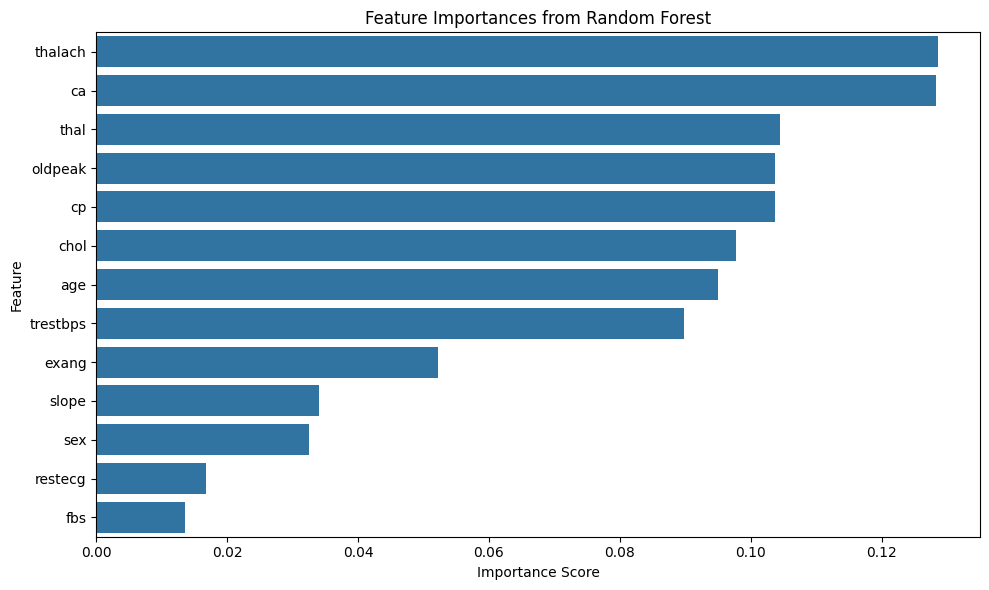

In [18]:
# === Feature Importance Plot ===
importances = model.feature_importances_
features = X.columns
indices = importances.argsort()[::-1]  # Sort by importance descending
# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=importances[indices], y=features[indices])
plt.title("Feature Importances from Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()